In [1]:
import numpy as np
import pandas as pd

from PIL import Image

from plotting import plot

In [2]:
import matplotlib.pyplot as plt

In [3]:
zeos = ['MOR','RHO','MFI','ITW']

Text(0.5, 0, 'num of al subs')

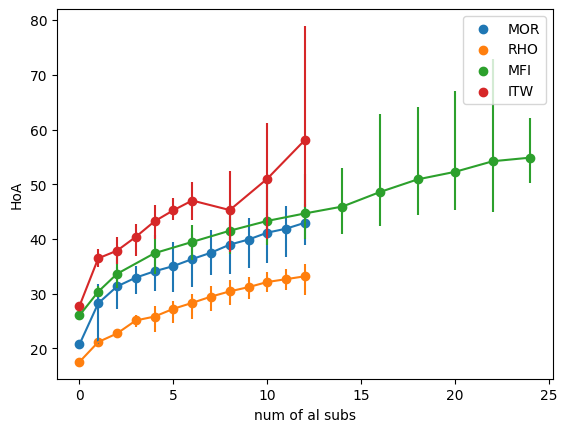

In [4]:
for zeo in zeos:
    atoms, hoa = np.load(f'data/{zeo}/atoms.npy'), np.load(f'data/{zeo}/hoa.npy')
    n_ats = atoms.sum(1)
    x = []
    y = []
    y_ci_min = []
    y_ci_max = []
    for i in np.unique(n_ats):
        _x = hoa[n_ats==i]
    
        x.append(i)
        y.append(np.mean(_x))
    
        b,t = np.quantile(_x, [0.05, 0.95])
        y_ci_min.append(b)
        y_ci_max.append(t)
    
    line = plt.plot(x,y)
    plt.scatter(x,y, c=line[0].get_color(), label=zeo)
    plt.vlines(x, y_ci_min, y_ci_max, colors=line[0].get_color())
plt.legend()
plt.ylabel('HoA')
plt.xlabel('num of al subs')

In [5]:
true_zeos = [np.asarray(Image.open(f'figures/{i}.png')) for i in zeos]


In [6]:
# h, w
ratios = [i.shape[1]/i.shape[0] for i in true_zeos]
ratios

[0.8894409937888199, 1.0, 0.6908517350157729, 0.6930051813471503]

In [7]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
scl = 3

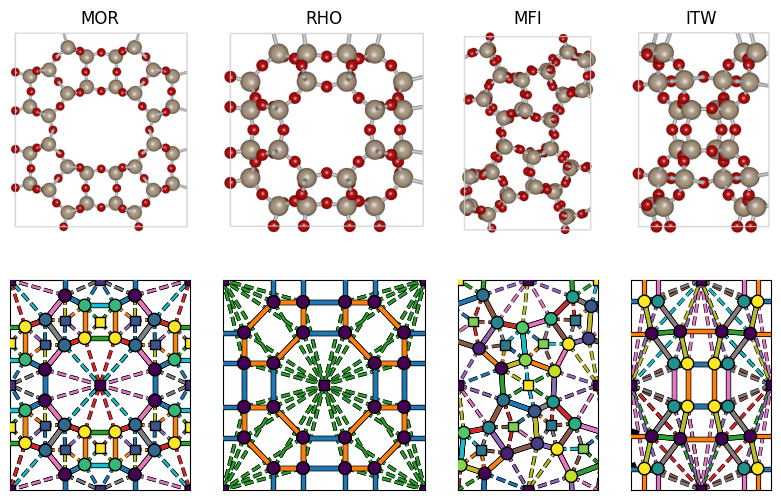

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=4, gridspec_kw={'width_ratios': ratios, 'height_ratios':[1,1]}, figsize=(sum(ratios)*scl, 2*scl))
true_zeos = [np.asarray(Image.open(f'figures/{i}.png')) for i in zeos]

for i in range(len(zeos)):

    true_zeo = np.asarray(Image.open(f'figures/{zeos[i]}.png'))
    ax[0,i].imshow(true_zeo)
    ax[0,i].axis('off')
    ax[0,i].set_title(zeos[i])
    
    plot(zeos[i], ax[1,i])
    #ax[1,i].imshow(ml_zeo)

fig.savefig('figures/zeovsml.pdf')

In [ ]:
fig1 = plt.figure()
plt.scatter([0,1,2], [3,5,4])

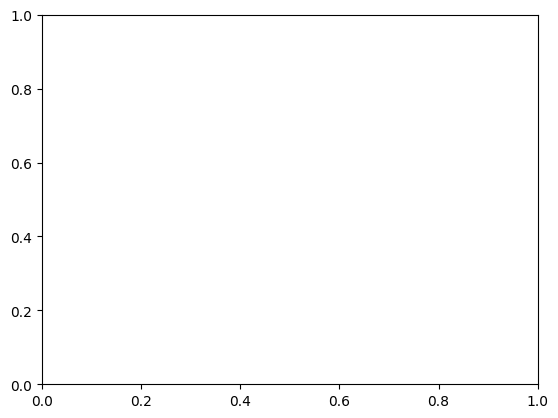

In [7]:
f,a = plt.subplots()
a = fig1